In [23]:
#Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

In [24]:
# Generate a new set of 1,500 random latitudes and longitudes.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [25]:
# Add the latitudes and longitudes in a list.
coordinates = list(lats_lngs)

In [26]:
# import the citipy module.
from citipy import citipy

In [27]:
#Create a list for holding the names of cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

590

In [28]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [29]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=baabf05c40690d50dd8876ce871ab4f7


In [30]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description=city_weather["weather"][0]["description"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Rain data
        try:
            city_rain = city_weather["rain"]["3h"]
            
        except:
            city_rain = 0.00 
            
        try:
            city_snow = city_weather["snow"]["3h"]
        except:
            city_snow = 0.00
            
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                            "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,                                                         
                             "Current Description":city_weather_description,
                              "Rain inches (last 3hrs)":city_rain,
                                "Snow inches (last 3hrs)":city_snow})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | mount isa
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | traverse city
Processing Record 7 of Set 1 | sahrak
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | vanderhoof
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | boa vista
Processing Record 13 of Set 1 | champerico
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | komsomolskiy
Processing Record 16 of Set 1 | bouafle
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | geresk
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | tarudant
Cit

Processing Record 33 of Set 4 | nelson bay
Processing Record 34 of Set 4 | chuy
Processing Record 35 of Set 4 | vila velha
Processing Record 36 of Set 4 | coquimbo
Processing Record 37 of Set 4 | jember
Processing Record 38 of Set 4 | vila franca do campo
Processing Record 39 of Set 4 | isangel
Processing Record 40 of Set 4 | cockburn town
Processing Record 41 of Set 4 | adrar
Processing Record 42 of Set 4 | rundu
Processing Record 43 of Set 4 | hargeysa
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | gravdal
Processing Record 46 of Set 4 | richards bay
Processing Record 47 of Set 4 | tucuman
Processing Record 48 of Set 4 | becerril
Processing Record 49 of Set 4 | san felipe
Processing Record 50 of Set 4 | puerto escondido
Processing Record 1 of Set 5 | mwinilunga
Processing Record 2 of Set 5 | astoria
Processing Record 3 of Set 5 | japura
Processing Record 4 of Set 5 | comodoro rivadavia
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | zhe

Processing Record 28 of Set 8 | kayfan
City not found. Skipping...
Processing Record 29 of Set 8 | canutama
Processing Record 30 of Set 8 | candelaria
Processing Record 31 of Set 8 | fortuna foothills
Processing Record 32 of Set 8 | tarhunah
City not found. Skipping...
Processing Record 33 of Set 8 | dongsheng
Processing Record 34 of Set 8 | bubaque
Processing Record 35 of Set 8 | chanthaburi
Processing Record 36 of Set 8 | nouadhibou
Processing Record 37 of Set 8 | touros
Processing Record 38 of Set 8 | kristinehamn
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | waiouru
Processing Record 41 of Set 8 | gisborne
Processing Record 42 of Set 8 | chicama
Processing Record 43 of Set 8 | volosovo
Processing Record 44 of Set 8 | acapulco
Processing Record 45 of Set 8 | sao felix do xingu
Processing Record 46 of Set 8 | san jose
Processing Record 47 of Set 8 | hami
Processing Record 48 of Set 8 | lavrentiya
Processing Record 49 of Set 8 | moree
Processing Record 50 of Se

Processing Record 17 of Set 12 | buritizeiro
Processing Record 18 of Set 12 | chepareria
Processing Record 19 of Set 12 | caborca
Processing Record 20 of Set 12 | tiruvallur
Processing Record 21 of Set 12 | numan
Processing Record 22 of Set 12 | vangaindrano
Processing Record 23 of Set 12 | kontagora
Processing Record 24 of Set 12 | xinyang
Processing Record 25 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 26 of Set 12 | ayorou
Processing Record 27 of Set 12 | urfa
City not found. Skipping...
Processing Record 28 of Set 12 | abalak
Processing Record 29 of Set 12 | balakhta
Processing Record 30 of Set 12 | suntar
Processing Record 31 of Set 12 | codrington
Processing Record 32 of Set 12 | kant
Processing Record 33 of Set 12 | tatvan
Processing Record 34 of Set 12 | bokoro
Processing Record 35 of Set 12 | haicheng
Processing Record 36 of Set 12 | meulaboh
Processing Record 37 of Set 12 | fortuna
Processing Record 38 of Set 12 | skjervoy
Processing Record 39 of Set 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Rain inches (last 3hrs),Snow inches (last 3hrs)
0,Nanortalik,GL,2022-02-13 23:00:14,60.1432,-45.2371,27.14,90,100,8.05,light snow,0.0,0.0
1,Bambous Virieux,MU,2022-02-13 23:00:16,-20.3428,57.7575,81.21,85,87,13.94,light rain,0.0,0.0
2,Mount Isa,AU,2022-02-13 23:00:17,-20.7333,139.5000,80.37,65,39,5.75,scattered clouds,0.0,0.0
3,Kapaa,US,2022-02-13 23:00:18,22.0752,-159.3190,79.20,64,70,5.01,broken clouds,0.0,0.0
4,Lebu,CL,2022-02-13 23:00:20,-37.6167,-73.6500,62.22,81,75,6.62,broken clouds,0.0,0.0
5,Traverse City,US,2022-02-13 22:59:55,44.7631,-85.6206,14.74,51,12,4.00,few clouds,0.0,0.0
6,Ushuaia,AR,2022-02-13 22:58:04,-54.8000,-68.3000,38.86,87,100,36.82,moderate rain,0.0,0.0
7,Vanderhoof,CA,2022-02-13 23:00:21,54.0166,-124.0198,37.08,93,100,4.07,overcast clouds,0.0,0.0
8,Boa Vista,BR,2022-02-13 23:00:22,2.8197,-60.6733,85.98,54,20,10.36,few clouds,0.0,0.0
9,Champerico,GT,2022-02-13 23:00:23,14.3000,-91.9167,90.77,61,1,10.22,clear sky,0.0,0.0


In [31]:
# Create the output file (CSV).
output_data_file = "weather-data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

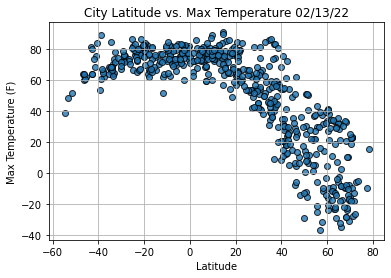

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather-data/Fig1.png")

# Show plot.
plt.show()

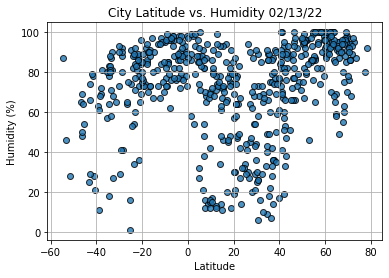

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather-data/Fig2.png")
# Show plot.
plt.show()

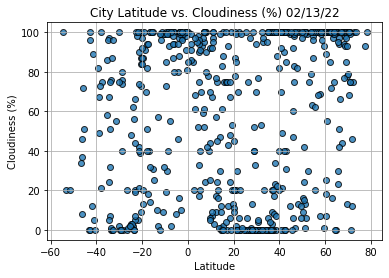

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather-data/Fig3.png")
# Show plot.
plt.show()

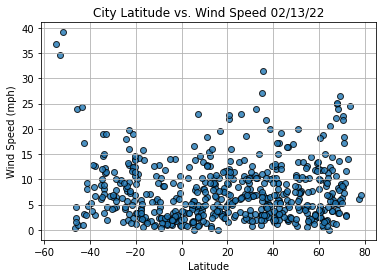

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather-data/Fig4.png")
# Show plot.
plt.show()

In [45]:
from scipy.stats import linregress

In [47]:
#Create a function to create perform linear regression on the weather data  and  
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y-values" from the slope and the intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]
index13

City                                     Vaini
Country                                     TO
Date                       2022-02-13 23:00:25
Lat                                      -21.2
Lng                                     -175.2
Max Temp                                 80.71
Humidity                                    73
Cloudiness                                  90
Wind Speed                               18.95
Current Description            overcast clouds
Rain inches (last 3hrs)                    0.0
Snow inches (last 3hrs)                    0.0
Name: 13, dtype: object

In [51]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
560     True
561    False
562     True
563    False
564     True
Name: Lat, Length: 565, dtype: bool

In [52]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Rain inches (last 3hrs),Snow inches (last 3hrs)
0,Nanortalik,GL,2022-02-13 23:00:14,60.1432,-45.2371,27.14,90,100,8.05,light snow,0.0,0.0
3,Kapaa,US,2022-02-13 23:00:18,22.0752,-159.3190,79.20,64,70,5.01,broken clouds,0.0,0.0
5,Traverse City,US,2022-02-13 22:59:55,44.7631,-85.6206,14.74,51,12,4.00,few clouds,0.0,0.0
7,Vanderhoof,CA,2022-02-13 23:00:21,54.0166,-124.0198,37.08,93,100,4.07,overcast clouds,0.0,0.0
8,Boa Vista,BR,2022-02-13 23:00:22,2.8197,-60.6733,85.98,54,20,10.36,few clouds,0.0,0.0


In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

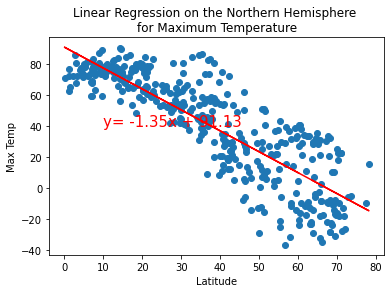

The r-value is -0.847


In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

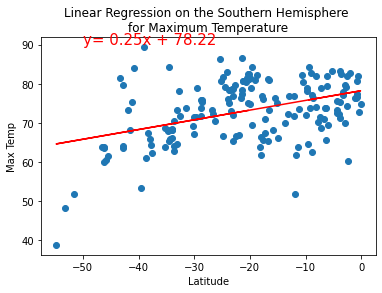

The r-value is 0.421


In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

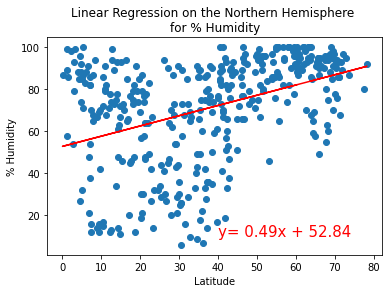

The r-value is 0.403


In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

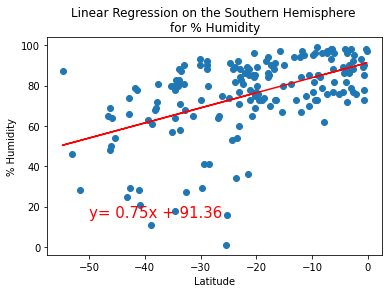

The r-value is 0.518


In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

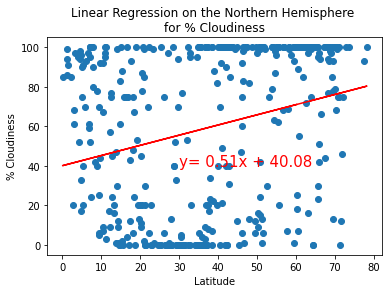

The r-value is 0.262


In [64]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(30,40))

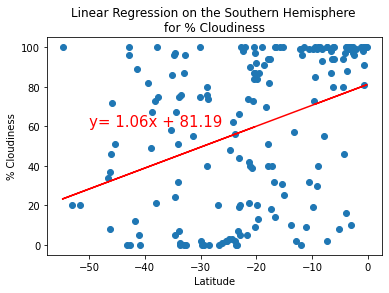

The r-value is 0.370


In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

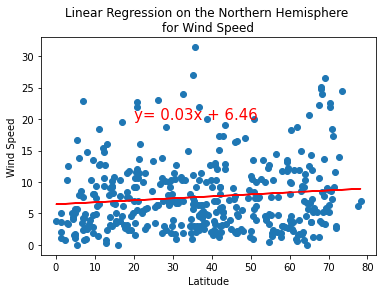

The r-value is 0.117


In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(20,20))

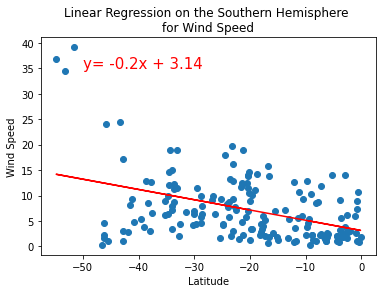

The r-value is -0.422


In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 